In [53]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [54]:
train = pd.read_csv('./data/bank_customer/train.csv')
test = pd.read_csv('./data/bank_customer/test.csv')
sample = pd.read_csv('./data/bank_customer/submit_sample.csv', header=None)

In [55]:
train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure,1
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown,1
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success,1


In [56]:
trainX = train.iloc[:, 0:17]
trainX.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success


In [57]:
y = train['y']

In [58]:
test.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,30,management,single,tertiary,no,1028,no,no,cellular,4,feb,1294,2,-1,0,unknown
1,2,39,self-employed,single,tertiary,no,426,no,no,unknown,18,jun,1029,1,-1,0,unknown
2,3,38,technician,single,tertiary,no,-572,yes,yes,unknown,5,jun,26,24,-1,0,unknown
3,4,34,technician,single,secondary,no,-476,yes,no,unknown,27,may,92,4,-1,0,unknown
4,5,37,entrepreneur,married,primary,no,62,no,no,cellular,31,jul,404,2,-1,0,unknown


In [59]:
testX = test.copy()

In [60]:
trainX = pd.get_dummies(trainX)
testX = pd.get_dummies(testX)

In [61]:
clf1 = DT(max_depth=2, random_state=0)

In [62]:
clf1.fit(trainX, y)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [63]:
export_graphviz(clf1, out_file='./data/bank_customer/tree.dot', feature_names=trainX.columns, class_names=['0', '1'], filled=True, rounded=True)

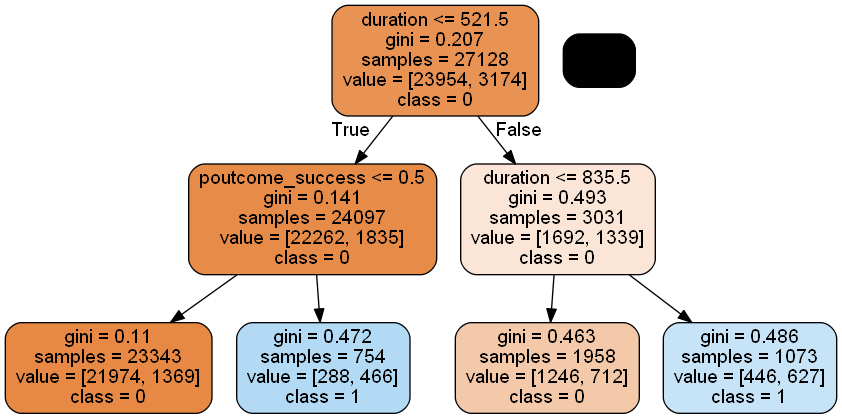

In [64]:
g = pydotplus.graph_from_dot_file(path='./data/bank_customer/tree.dot')
Image(g.create_png())

In [65]:
pred = clf1.predict_proba(testX)[:, 1]
pred

array([0.58434296, 0.58434296, 0.05864713, ..., 0.05864713, 0.05864713,
       0.05864713])

In [66]:
sample[1] = pred
sample.to_csv('./data/bank_customer/submit1_bank.csv', index=None, header=None)

In [67]:
clf2 = DT(max_depth=4, min_samples_leaf=500)

In [68]:
clf2.fit(trainX, y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=500)

In [69]:
export_graphviz(clf2, out_file='./data/bank_customer/tree2.dot', feature_names=trainX.columns, class_names=['0', '1'], filled=True, rounded=True)

In [70]:
pred2 = clf2.predict_proba(testX)[:, 1]
pred2

array([0.62151394, 0.55166375, 0.00945563, ..., 0.00945563, 0.04502211,
       0.00945563])

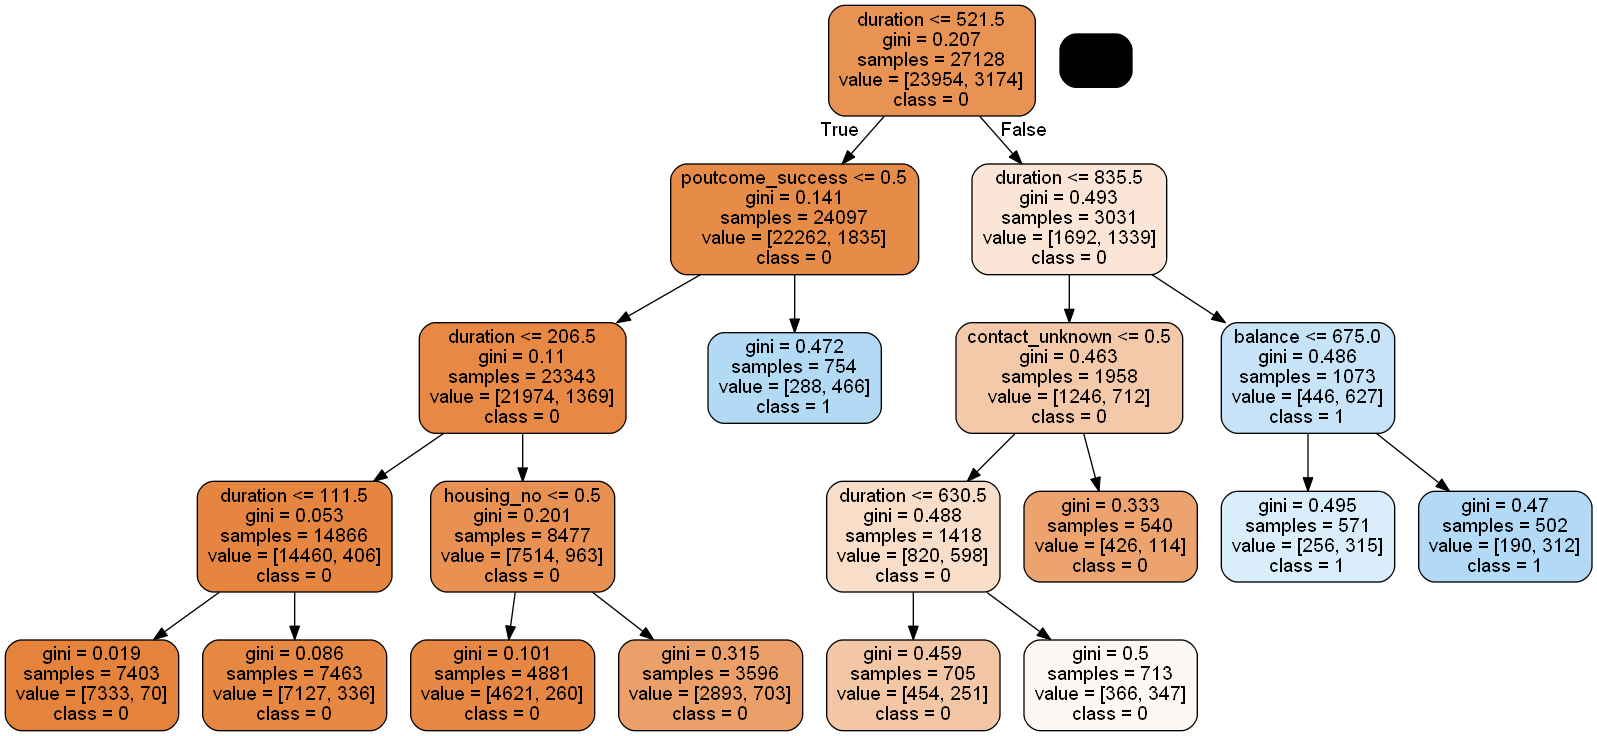

In [72]:
g = pydotplus.graph_from_dot_file(path='./data/bank_customer/tree2.dot')
Image(g.create_png())

In [71]:
sample[1] = pred2
sample.to_csv('./data/bank_customer/submit2_bank.csv', index=None, header=None)